<a href="https://colab.research.google.com/github/junk151516/RedesNeuronales/blob/main/Trabajo_final_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="left">
<p><img alt="Sapiencia" height="140px" src="https://ubicua.ingeniaudea.co/pluginfile.php/32974/coursecat/description/RF_RedesNeuronales.png" align="left" hspace="10px" vspace="0px"></p></div>
<div align="left"></div>
<div>

<br></br>

<div align="left">
<br></br>
<br></br>



<hr size=10 noshade color="#663398">
</p>

<div align="right">
<h1> <b> Trabajo final redes neuronales </b> </h1>
<br>


**El presente material hace parte de la ruta de formación del talento especializado de SAPIENCIA**

**Los documentos que utilizaremos en la presente y proximas clases son una mezcla del trabajo de muchos profesores y académicos.**

**En caso de utilizar el presente contenido favor citarlo y brindar los créditos respectivos.**

#**Descripción trabajo final**

<p>
  1. Analizar el código paso a paso y entenderlo y realizar una breve explicación de como funciona.<br>
  2. Realizar módificaciones variando parámetros como la cantidad de neuronas, tipo de optimizador, funciones de activación, funciones de perdida y tamaños de entrada de la imagen.<br>
  3. A partir del entendimiento del código en el punto 1 responda las siguientes preguntas: <br>
  <ul>
    <li> ¿Cual es el objetivo de categorizar los targets o labels correspondientes a cada imagen? </li>
    <li> ¿En que me ayuda la normalización a la hora de entrenar los datos? </li>
  </ul>
  <p>
  4. Realice un informe detallando los resultados obtenidos en el punto 2. El informe debe responder las siguiente preguntas:
  <ul>
    <li> ¿Cómo variaron los resultados con el aumento o disminución de las neuronas?</li>
    <li> ¿Cómo cambia la presición del modelo propuesto, al cambiar la función de activación, que se logra observar de los resultados?</li>
    <li> ¿Cuál sería a su criterio la función de activación que se adapta al presente análisis ?</li>
    <li> ¿Cómo se comportaron los resultados de las funciones de perdidas analizadas?</li>
    <li> ¿Mejoraron los resultados al reducir o aumentar el tamaño de entrada de la imagen?</li>
    <li> ¿Cuál fue la mejor solución que logró encontrar y por qué?</li>

  </ul>

  Nota: El informe debe llevar los valores que probaron en el módelo y para lo cuál como minimo se deben analizar 4 optimizadores,4 funciones de activación, 4 funciones de perdida, 4 opciones de neuronas y tamaños de entrada de la imagen. <br>
<p>
  5. Concluir en que casos se debe utilizar los optimizadores,funciones de perdida, funciones de activación y tener en cuenta que se debe presentar una gráfica representativa de cada función de activación describiendo los rangos de la función y su comportamiento.
</p>

##**Porcentajes de calificación:**


1.   Punto 1 : 10%
2.   Punto 2 : 10%
3.   Punto 3 : 10%
4.   Punto 4 : 25%
5.   Punto 5 : 15%
6.   Sustentación : 30%


##**Limitantes**
   Grupos máximo de 3 personas y mínimo de 2 personas


---

### Esto le permite utilizar TensorFlow en el proyecto de aprendizaje automático y realizar tareas como entrenar modelos de redes neuronales, inferencia y otras herramientas que tiene la biblioteca de tensorflow.

In [1]:
pip install tensorflow

# Aqui se instala la libreria de Keras, segun platzi "se usa para crear prototipos rápidamente y de manera fácil, pues está pensada para que sea fácil de usar", por lo tanto funciona como puente a repocitorios donde se alojan ejemplos de redes a usar

In [ ]:
pip install keras

## aqui se instancia a numpy como np, para poder usar calculos numericos y el analisis de datos
## se importa las capas(layers) y modelos(models) de Keras
**texto en negrita**

In [8]:
## aqui se instancia a numpy como np, para poder usar calculos numericos y el analisis de datos
import numpy as np
# se importa las capas(layers) y modelos(models) de Keras
from keras import layers, models
# La función to_categorical se utiliza para convertir etiquetas categóricas en un formato apropiado para entrenar modelos de aprendizaje profundo.
from keras.utils import to_categorical
# aqui importa el dataset mnist, que es un conjunto de datos para reconocimiento de dijitos escritos a mano
from keras.datasets import mnist
#se importa pyplot como plt para la creacion de graficos y vusualizacion de datos
import matplotlib.pyplot as plt
#se importa pandas como pd para la manipulación y análisis de datos
import pandas as pd

In [ ]:
#con esta linea descargo de los datos de entrenamientos y de test de la libreria mnist dichos datos estan divididos por tuplas donde cada dato se corresponde con su etiqueta
(train_data, train_labels), (test_data, test_labels) =mnist.load_data()
# Aplana las imágenes ; convierte cada imagen bidimensional en un vector unidimensional.
train_data_flattened = train_data.reshape(train_data.shape[0], -1)
#se crea un DataFrame en el que se pueden realizar diversas operaciones de análisis de datos.
train_data_df = pd.DataFrame(train_data_flattened)

In [18]:
#se muestra el arreglo de matrices que contiene los datos de entrenamiento
train_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [14]:
#muestra las primeras 10 filas del dataframe, se puede visualizar que tiene 783 columnas que corresponden la imagen aplanada de 28 x 28 = 784 y como la columna 0 ....
train_data_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#muestra la forma y dimenciones del dataframe en este caso tiene 60.000 filas x 784 columnas, es decir 60.000 datos de entrenamiento y los 784 pixeles de cada imagen
train_data_df.shape

(60000, 784)

In [10]:
#aqui se puede apreciar que los datos de entrenamiento originales son 60.000 en matrices de 28 x 28 pixeles
train_data.shape

(60000, 28, 28)

In [19]:
#muestra la columna con etiqueta "0" de las 60.000 imagenes de entrenamiento, es como hacer referencia a solo el pixel de la esquina superior izquierda de cada imagen,
# y por como esta construido el dataset es ovio que todos o la mayoria darian cero
train_data_df[0]

0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: 0, Length: 60000, dtype: uint8

In [ ]:
#Se accede a la primera imagen o la imagen en la posición 0 del conjunto de entrenamiento, dicha expresión muestra los valores de la matriz de 28 x28 que contiene cada una,
#se puede observar que los valores van de 0 a 255 donde 0 debe representar el blanco y 255 el negro, por lo tanto la imagen contiene información en escala de grises.
train_data[0]

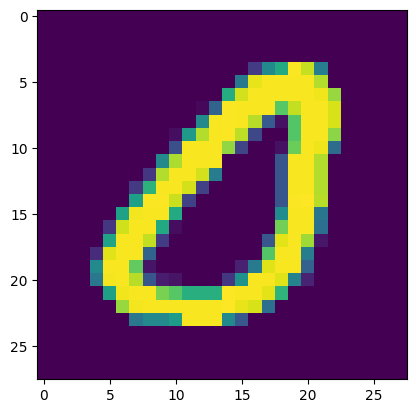

In [13]:
#Con este comando, representamos de manera visual la imagen escrita a mano en la posición 689 del conjunto de datos MNIST. Esta representación visual resulta muy útil para inspeccionar los datos del conjunto,
# especialmente cuando se trata de información visual, como imágenes de dígitos escritos a mano."
plt.imshow(train_data[689])

In [ ]:
#aqui se muestra la etiquieta que corresponde a el dato de entrenamiento 689 y claramete se corresponde con la imagen anterior
train_labels[689]

0

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
x_train = train_data_df
#x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [ ]:
x_train[0]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
59995    0.0
59996    0.0
59997    0.0
59998    0.0
59999    0.0
Name: 0, Length: 60000, dtype: float32

In [ ]:
y_train = to_categorical(train_labels)
y_test =to_categorical(test_labels)

In [ ]:
train_labels[0]

5

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
tensorboardDenso = TensorBoard(log_dir ='logs/denso')

In [ ]:
history = model.fit(x_train, y_train, epochs=20,callbacks=[tensorboardDenso], batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 0.2612 - accuracy: 0.9255 - precision: 0.9532 - val_loss: 0.1320 - val_accuracy: 0.9612 - val_precision: 0.9697
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1058 - accuracy: 0.9690 - precision: 0.9752 - val_loss: 0.0915 - val_accuracy: 0.9720 - val_precision: 0.9772
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0698 - accuracy: 0.9793 - precision: 0.9826 - val_loss: 0.0701 - val_accuracy: 0.9768 - val_precision: 0.9808
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0507 - accuracy: 0.9847 - precision: 0.9869 - val_loss: 0.0722 - val_accuracy: 0.9769 - val_precision: 0.9803
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0386 - accuracy: 0.9889 - precision: 0.9904 - val_loss: 0.0612 - val_accuracy: 0.9815 - val_precision: 0.9834
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - lo

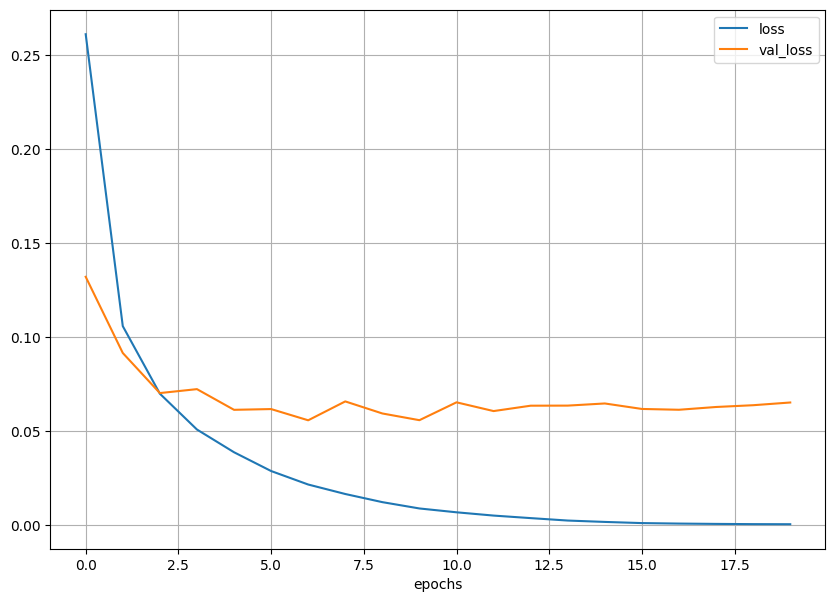

In [ ]:


pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0651 - accuracy: 0.9849 - precision: 0.9856


[0.06512981653213501, 0.9848999977111816, 0.9855899214744568]

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
 %reload_ext tensorboard

In [ ]:
%tensorboard --logdir logs


<IPython.core.display.Javascript object>

In [ ]:
!kill 8369